# Random Forests - Visualization

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
# import pydotplus

from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from IPython.core.display import display, HTML

import RandomForestHelper as RFH

## Example

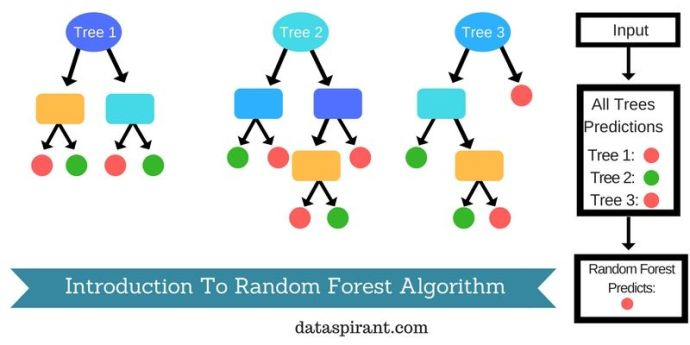

In [2]:
Image(filename="Random-Forest-Introduction.jpg")

In [3]:
%config IPCompleter.greedy=True

Refer: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Parameters for a Random Forest:

<ul>
	<li>n_estimators</li>
	<li>criterion</li>
	<li>max_features</li>
	<li>max_depth</li>
	<li>min_samples_split</li>
	<li>min_samples_leaf</li>
	<li>min_weight_fraction_leaf</li>
	<li>max_leaf_nodes</li>
	<li>min_impurity_split</li>
	<li>min_impurity_decrease</li>
	<li>bootstrap</li>
	<li>oob_score</li>
	<li>n_jobs</li>
	<li>random_state</li>
	<li>verbose</li>
	<li>warm_start</li>
	<li>class_weight</li>
</ul>

# The Iris flower dataset

<ul>
    <li>Consists of 50 samples from each of the three flower species of Iris (Iris setosa, Iris virginica and Iris versicolor). </li>
    <li>Four features present for each sample: the length and the width of the sepals and petals, in centimetres. </li>
</ul>

In [4]:
#Loading the Iris dataset from sklearn
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [5]:
#IRIS Dataset
print(df.sample(10))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
115                6.4               3.2                5.3               2.3
111                6.4               2.7                5.3               1.9
99                 5.7               2.8                4.1               1.3
10                 5.4               3.7                1.5               0.2
57                 4.9               2.4                3.3               1.0
64                 5.6               2.9                3.6               1.3
4                  5.0               3.6                1.4               0.2
73                 6.1               2.8                4.7               1.2
75                 6.6               3.0                4.4               1.4
32                 5.2               4.1                1.5               0.1


In [6]:
#Sampling 10 random samples
sample = df.sample(5)
sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
72,6.3,2.5,4.9,1.5
91,6.1,3.0,4.6,1.4
116,6.5,3.0,5.5,1.8
13,4.3,3.0,1.1,0.1
42,4.4,3.2,1.3,0.2


# The random forest classifier

Parameters being changed:
1. **Max_depth**: The deepest level to which a decision tree can go to
2. **n_estimators**: The number of decision trees that are generated and eventually used for majority voting

In [7]:
rf = RandomForestClassifier(max_depth=2, n_estimators=7)
rf = rf.fit(df,y)

## Predicting Category

1. Different decision trees are generated from the input data.
2. For each sample, the category is decided based on the decision tree.
3. The final prediction is done by some form of ensemble learning on the outputs of the different trees. In this scenario, we use majority voting (Category that gets the most votes is predicted).

In [8]:
pred = RFH.predict_category(rf, sample)
html = RFH.generate_html(rf, sample, pred)

In [9]:
HTML(html)

,DTree 0,DTree 1,DTree 2,DTree 3,DTree 4,DTree 5,DTree 6,Prediction
72,1,2,2,2,2,1,2,2
91,1,1,1,1,1,1,2,1
116,2,2,2,2,2,2,2,2
13,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0


## Visualizing a specific Decision Tree from a Random Forest

In [10]:
legend = """Attributes: 
    <ul>
        <li><b>X0, X1, X2, X3</b>: sepal length, sepal width, petal length, petal width</li>
        <li><b>Samples</b>: Number of samples considered for building this decision tree</li>
        <li><b>Value</b>: Number of samples in each of the three categories of flowers in order</li>
    </ul>
    """

Decision Tree 0 : 


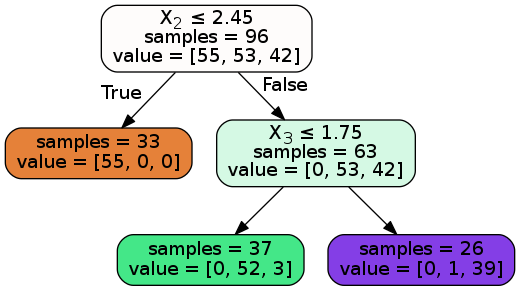

In [11]:
RFH.generate_tree(rf, 0, height=500, width=400) #ith Decision Tree: Where i is the Decision Tree number according to the above table)
HTML(legend)

In [12]:
#To get information on ith value in the pandas dataframe
df.iloc[77]

sepal length (cm)    6.7
sepal width (cm)     3.0
petal length (cm)    5.0
petal width (cm)     1.7
Name: 77, dtype: float64

**You are encouraged to explore the RandomForestCalssifier by altering parameters passed to it.**